# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [147]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/williamfeid/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [148]:
# Read your api key environment variable
load_dotenv("../WBF.env")
api_key = os.getenv("news_api")

In [149]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [150]:
# Fetch the Bitcoin news articles
btc_articles = newsapi.get_everything(q="Bitcoin", language="en", page_size=100, sort_by="relevancy")

In [151]:
# Fetch the Ethereum news articles
eth_articles = newsapi.get_everything(q="ethereum", language="en", page_size=100, sort_by="relevancy")

In [152]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []
for article in btc_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:30]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
})
    except AttributeError:
        pass
    
btc_df = pd.DataFrame(btc_sentiments)
# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]
btc_df.head()

,date,text,compound,positive,negative,neutral
0,2021-06-09T12:04:40Z,El Salvador's President Nayib Bukele has made ...,0.8402,0.282,0.0,0.718
1,2021-06-09T10:00:00Z,El Salvador has become the first country in th...,0.1280,0.043,0.0,0.957
2,2021-06-14T07:15:49Z,"It's all about clean energy, it seems. \r\nElo...",0.6908,0.169,0.0,0.831
3,2021-06-09T08:27:58Z,image captionThe move means bitcoin will be ac...,0.2732,0.060,0.0,0.940
4,2021-06-11T00:45:00Z,"Several crypto fans that descended on Miami, F...",0.5574,0.107,0.0,0.893


In [153]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []
for article in eth_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:30]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
})
    except AttributeError:
        pass
    
eth_df = pd.DataFrame(eth_sentiments)
# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]
eth_df.head()

,date,text,compound,positive,negative,neutral
0,2021-06-17T04:05:00Z,TL;DR: The Cryptocurrency with Ethereum and So...,0.000,0.0,0.000,1.000
1,2021-06-20T19:28:07Z,It wasn't long ago that your average person ha...,-0.296,0.0,0.061,0.939
2,2021-05-31T12:17:00Z,A representation of virtual currency Ethereum ...,0.000,0.0,0.000,1.000
3,2021-06-10T19:12:00Z,This article was translated from our Spanish e...,-0.340,0.0,0.066,0.934
4,2021-06-03T10:00:00Z,This new mining feature is called 'Norton Cryp...,0.000,0.0,0.000,1.000


In [154]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.00000,100.000000,100.000000
mean,0.030488,0.04636,0.034780,0.918880
std,0.375969,0.06407,0.046767,0.072004
min,-0.778300,0.00000,0.000000,0.718000
25%,-0.273200,0.00000,0.000000,0.871000
50%,0.000000,0.00000,0.000000,0.926000
75%,0.323650,0.07975,0.073500,1.000000
max,0.840200,0.28200,0.178000,1.000000


In [155]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.104065,0.055860,0.029060,0.915070
std,0.379157,0.067377,0.053916,0.080914
min,-0.868900,0.000000,0.000000,0.655000
25%,0.000000,0.000000,0.000000,0.867000
50%,0.000000,0.039000,0.000000,0.927000
75%,0.362175,0.092750,0.061000,1.000000
max,0.848100,0.290000,0.286000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had the higher mean positive score, indicating that recent articles were more favorible for Ethereum than Bitcoin.

Q: Which coin had the highest compound score?

A: Ethereum had a higher compaund score, while Bitcoin had a negative compound score.

Q. Which coin had the highest positive score?

A: Bitcoin had the highest postive score of 0.282

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [156]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [157]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addons = {'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'char', 'reuters', 'us', 'June', 'May', 'July',
            'may', 'june', 'ha', 'el'}

In [158]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase and remove stopwords
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    
  
    return tokens

In [159]:
# Create a new tokens column for Bitcoin
btc_df['tokens'] = btc_df.apply(lambda x : tokenizer(x['text']), axis=1)
btc_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-06-09T12:04:40Z,El Salvador's President Nayib Bukele has made ...,0.8402,0.282,0.0,0.718,"[salvadors, president, nayib, bukele, made, go..."
1,2021-06-09T10:00:00Z,El Salvador has become the first country in th...,0.1280,0.043,0.0,0.957,"[salvador, become, first, country, world, reco..."
2,2021-06-14T07:15:49Z,"It's all about clean energy, it seems. \r\nElo...",0.6908,0.169,0.0,0.831,"[clean, energy, seemselon, musk, tesla, caused..."
3,2021-06-09T08:27:58Z,image captionThe move means bitcoin will be ac...,0.2732,0.060,0.0,0.940,"[image, captionthe, move, mean, bitcoin, accep..."
4,2021-06-11T00:45:00Z,"Several crypto fans that descended on Miami, F...",0.5574,0.107,0.0,0.893,"[several, crypto, fan, descended, miami, flori..."


In [160]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = eth_df.apply(lambda x : tokenizer(x['text']), axis=1)
eth_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-06-17T04:05:00Z,TL;DR: The Cryptocurrency with Ethereum and So...,0.000,0.0,0.000,1.000,"[tldr, cryptocurrency, ethereum, solidity, blo..."
1,2021-06-20T19:28:07Z,It wasn't long ago that your average person ha...,-0.296,0.0,0.061,0.939,"[wasnt, long, ago, average, person, clue, nft,..."
2,2021-05-31T12:17:00Z,A representation of virtual currency Ethereum ...,0.000,0.0,0.000,1.000,"[representation, virtual, currency, ethereum, ..."
3,2021-06-10T19:12:00Z,This article was translated from our Spanish e...,-0.340,0.0,0.066,0.934,"[article, wa, translated, spanish, edition, us..."
4,2021-06-03T10:00:00Z,This new mining feature is called 'Norton Cryp...,0.000,0.0,0.000,1.000,"[new, mining, feature, called, norton, crypto,..."


In [161]:
eth_df = eth_df.drop(eth_df.index[2])
eth_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-06-17T04:05:00Z,TL;DR: The Cryptocurrency with Ethereum and So...,0.0000,0.000,0.000,1.000,"[tldr, cryptocurrency, ethereum, solidity, blo..."
1,2021-06-20T19:28:07Z,It wasn't long ago that your average person ha...,-0.2960,0.000,0.061,0.939,"[wasnt, long, ago, average, person, clue, nft,..."
3,2021-06-10T19:12:00Z,This article was translated from our Spanish e...,-0.3400,0.000,0.066,0.934,"[article, wa, translated, spanish, edition, us..."
4,2021-06-03T10:00:00Z,This new mining feature is called 'Norton Cryp...,0.0000,0.000,0.000,1.000,"[new, mining, feature, called, norton, crypto,..."
5,2021-05-27T00:45:00Z,"""We are building a team"" the page declares, st...",0.6705,0.188,0.000,0.812,"[building, team, page, declares, stating, welc..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [162]:
from collections import Counter
from nltk import ngrams

In [163]:
# Generate the Bitcoin N-grams where N=2
btc_corpus = btc_df['text'].tolist()
def bigram_counter(corpus):
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = tokenizer(big_string)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])

In [164]:
bigram_counter(btc_corpus)

,bigram,count
0,"(virtual, currency)",12
1,"(previous, closebitcoin)",11
2,"(closebitcoin, world)",11
3,"(world, biggest)",11
4,"(biggest, bestknown)",11
5,"(illustration, taken)",10
6,"(bestknown, cryptocurrency)",10
7,"(bitcoin, legal)",9
8,"(legal, tender)",8
9,"(elon, musk)",8


In [165]:
# Generate the Ethereum N-grams where N=2
eth_corpus = eth_df['text'].tolist()
bigram_counter(eth_corpus)

,bigram,count
0,"(previous, closebitcoin)",11
1,"(closebitcoin, world)",11
2,"(world, biggest)",11
3,"(biggest, bestknown)",11
4,"(bestknown, cryptocurrency)",10
5,"(opinions, expressed)",7
6,"(expressed, entrepreneur)",7
7,"(entrepreneur, contributor)",7
8,"(adding, previous)",6
9,"(illustration, taken)",6


In [166]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    top = dict(Counter(tokens).most_common(N))
    return pd.DataFrame(list(top.items()), columns=['words', 'count'])

In [167]:
# Use token_count to get the top 10 words for Bitcoin
btc_tokens = []
for sublist in btc_df['tokens']:
    for item in sublist:
        btc_tokens.append(item)
        
token_count(btc_tokens, 10)

,words,count
0,bitcoin,88
1,cryptocurrency,32
2,world,21
3,monday,18
4,currency,17
5,illustration,17
6,seen,16
7,virtual,13
8,taken,13
9,biggest,13


In [168]:
# Use token_count to get the top 10 words for Ethereum
eth_tokens = []
for sublist in eth_df['tokens']:
    for item in sublist:
        eth_tokens.append(item)
        
token_count(eth_tokens, 10)

,words,count
0,bitcoin,38
1,cryptocurrency,28
2,world,22
3,crypto,18
4,cryptocurrencies,17
5,ethereum,16
6,year,14
7,market,13
8,biggest,13
9,digital,12


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [178]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [10.0, 5.0]

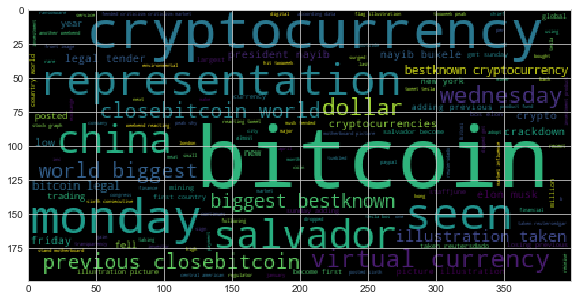

In [179]:
# Generate the Bitcoin word cloud
btc_string = ' '.join(btc_tokens)
btc_wc = WordCloud().generate(btc_string)
plt.imshow(btc_wc)

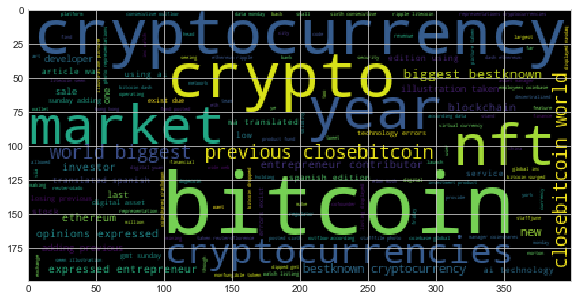

In [180]:
# Generate the Ethereum word cloud
eth_string = ' '.join(eth_tokens)
eth_wc = WordCloud().generate(eth_string)
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [181]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [182]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [191]:
# Concatenate all of the Bitcoin text together
btc_full_text = btc_df['text'].str.cat(sep=', ')

In [192]:
# Run the NER processor on all of the text
btc_ner = nlp(btc_full_text)

# Add a title to the document
btc_ner.user_data["title"] = "BTC Named Entity Recognition"

In [196]:
# Render the visualization
options = {"compact": True}
displacy.render(btc_ner, style='ent', options = options)

In [197]:
# List all Entities
print([ent.text for ent in btc_ner.ents])

["El Salvador's", 'Nayib Bukele', 'Central American', 'El Salvador', 'first', 'Nayib Bukele', 'Wednesday', 'Citizens', 'Elon Musk', 'Tesla', 'the past few months', 'first', 'Tesla', '$1.5 billion', 'US', 'El Salvador', 'first', 'Bitcoin', 'Miami', 'Florida', 'last weekend', 'covid-19', 'Larry Cermak', 'Last week', 'Disney', 'This week', 'Tec', 'PayPals', 'Wednesday', 'Jose Fernandez da Pontethe', 'Mary-Ann RussonBusiness', 'BBC News', 'US', 'Donald Trump', 'Fox Business', 'Bitcoin', 'US', 'Photo', 'Michele Doying', 'Verge', 'Iran', 'years', 'PayPal', 'Soon', 'PayPal', 'U.S.', 'Bitcoin', 'Concise', 'U.S.', 'SAN SALVADOR', 'June 16', 'Reuters', 'El Salvador', 'U.S.', 'Finance', 'Alejandro Zelaya', 'Wednesday', 'Central American', 'Bitcoin', 'May 20, 2021', 'Reuters', 'Reuters', 'El Salvador', 'U.S.', 'Finance', 'Alejandro Zelaya', 'Wednesday', 'the Central American', 'Colonial Pipeline', 'JBS', 'up to one quarter', 'US', 'Late last week', "Hong Kong's", 'first', 'Hong Kong', 'February 28

---

### Ethereum NER

In [198]:
# Concatenate all of the Ethereum text together
eth_full_text = eth_df['text'].str.cat(sep=', ')

In [199]:
# Run the NER processor on all of the text
eth_ner = nlp(eth_full_text)

# Add a title to the document
eth_ner.user_data["title"] = "ETH Named Entity Recognition"

In [200]:
# Render the visualization
options = {"compact": True}
displacy.render(eth_ner, style='ent', options = options)

In [201]:
# List all Entities
print([ent.text for ent in eth_ner.ents])

['21.25', 'June 17', '97%', 'NFT', 'hundreds of thousands', 'Spanish', 'AI', 'Last May', 'Buterin', '27', 'tomorrow', 'Norton', 'Norton', 'Norton Crypto', 'Entrepreneur', 'March 2021', 'more than one million', 'SafeMoon', 'CryptoPunks', 'decades', 'Ill', 'Jacks', 'Cristina CriddleTechnology', 'Kim Catdarshian', 'Ethereum', 'Spanish', 'AI', 'This week', 'March 2020', 'Tim Berners-Lee', 'NFT', "Sotheby's", 'NFT', 'Steven Ferdman', 'Mark Cuban', 'Ethereum', 'Polygon', 'Polygon', 'tEhereum', 'Two', 'Keep Network', 'Last week', 'Indonesia', 'first', 'today', 'Yao Qian', 'China', 'Sina Finance', 'Monday', 'Photo', 'S3studio/', 'Getty Images', 'May', '$1.93 billion', 'Entrepreneur', 'Costfoto', 'Barcroft Media', 'Getty Images', 'Yao Qian', 'China', 'two weeks', 'Bitcoin', '13 per cent', 'second', 'Eth', 'Bitcoin', '8.54 %', '36,265', 'Wednesday', '2,853.31', 'Bitcoin', '30.8%', 'year', '27,734', 'Jan.', 'Bitcoin', '5.71%', '35,210', '0600', 'GMT', 'Saturday', '2,131.11', 'Bitcoin', '45.7%', '

---